# Chapter 06: Matrices, Part 2

## Concepts

In [48]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# Matrix Norm (Frobenius)

matrix_a = np.random.randn(3, 3)

def frobenius_norm(matrix):
    sum_squares = 0
    for row in matrix:
        for element in row:
            sum_squares += element ** 2
    return sum_squares ** 0.5

def frobenius_norm_trace_method(matrix):
    return np.sqrt(np.trace(matrix @ matrix.T))

# Calculate the Frobenius norm with different methods
frobenius_norm_a = np.linalg.norm(matrix_a, 'fro')
frobenius_norm_b = frobenius_norm(matrix_a)
frobenius_norm_c = frobenius_norm_trace_method(matrix_a)
method_check = frobenius_norm_a == frobenius_norm_b == frobenius_norm_c

print("Random Matrix A:", "\n", matrix_a, "\n")
print("Frobenius Norm of A:", frobenius_norm_a, "\n")
print("Scratch methods match numpy implementaiton answer:", method_check)

Random Matrix A: 
 [[-0.33854911 -1.10982668  0.98947699]
 [ 0.52946188  0.19146929 -0.41350115]
 [-0.38293466  1.30739271 -1.88765237]] 

Frobenius Norm of A: 2.8692359921842794 

Scratch methods match numpy implementaiton answer: True


In [44]:
# Matrix Trace (Sum of diagonal elements)

matrix_a = np.random.randn(4, 4)

def matrix_trace(matrix):
    trace = 0
    for i in range(len(matrix)):
        trace += matrix[i][i]
    return trace
            

matrix_trace_a = np.trace(matrix_a)
matrix_trace_b = matrix_trace(matrix_a)
method_check = matrix_trace_a == matrix_trace_b

print("Matrix A:", "\n", matrix_a, "\n")
print("Trace of A:", matrix_trace_a, "\n")
print("Scratch methods match numpy implementaiton answer:", method_check)

Matrix A: 
 [[-0.25913831  0.70770955  1.30725195 -0.83340797]
 [-1.55749691  0.28195571  0.62658679 -0.80314645]
 [-1.7444235  -0.09386249 -3.35627243  0.89972117]
 [ 1.66765642  1.58168147 -0.95307876  0.04692725]] 

Trace of A: -3.2865277823685686 

Scratch methods match numpy implementaiton answer: True


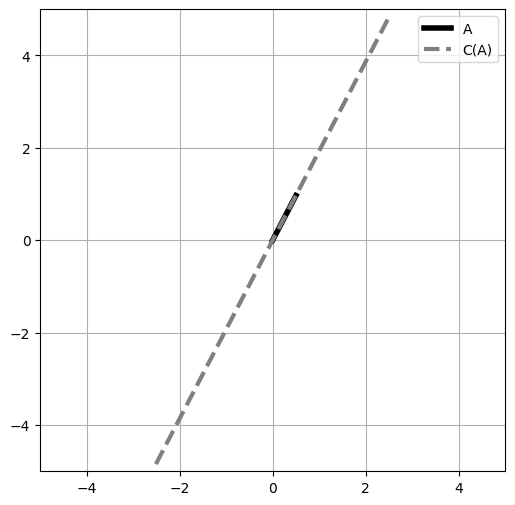

In [61]:
# Column Spaces (just one lonely little column)

matrix_a = np.random.rand(2,1)

xlim = [-5,5]
colspace_p1 = xlim[0] * matrix_a
colspace_p2 = xlim[1] * matrix_a

plt.figure(figsize=(6,6))
plt.plot([0, matrix_a[0,0]], [0,matrix_a[1,0]], 'k', linewidth=4, label='A')
plt.plot([colspace_p1[0,0], colspace_p2[0,0]], [colspace_p1[1,0], colspace_p2[1,0]],
         '--', linewidth=3, color='grey', label='C(A)')
plt.xlim(xlim)
plt.ylim(xlim)
plt.legend()
plt.grid()
plt.show()

NameError: name 'A1' is not defined

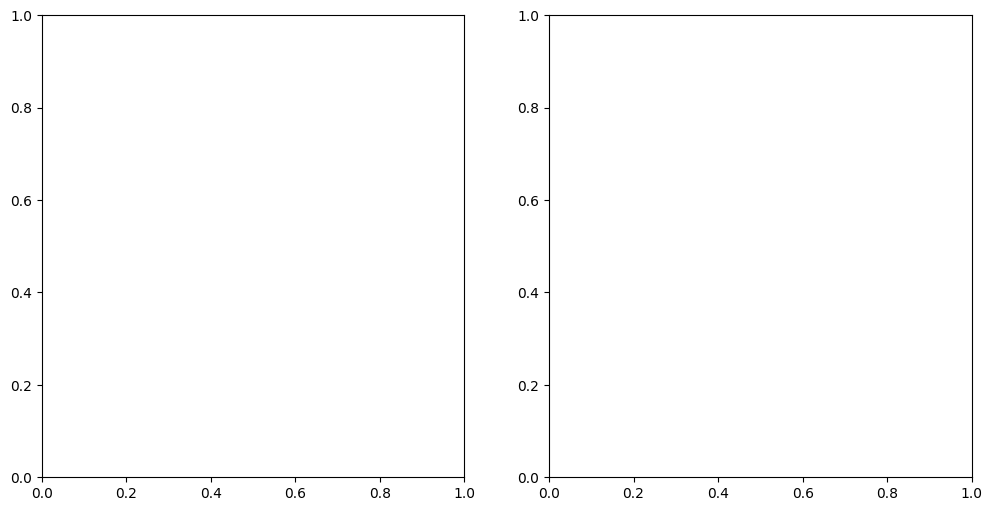

In [65]:
# Column Spaces (2D)

# some matrix
matrix_a = np.random.randn(2,2)
matrix_b = np.random.randn(2,2)

# some other plotting specifications
xlim = [-6,6]
color = [ [0,0,0],[.7,.7,.7] ]


# make the plot
_,axs = plt.subplots(1,2,figsize=(12,6))

# loop over columns
for i in range(2):
  axs[0].plot([0,matrix_a[0,i]],[0,matrix_a[1,i]],color=color[i],linewidth=4)
  axs[1].plot([0,matrix_b[0,i]],[0,matrix_b[1,i]],color=color[i],linewidth=4,zorder=-i)
  
  # set some axis properties
  axs[i].set_xlim(xlim)
  axs[i].set_ylim(xlim)
  axs[i].grid()
  axs[i].text(xlim[0]-.7,xlim[1]+.5,f'{"AB"[i]})',fontweight='bold',fontsize=16)

# set the legends and subplot letters
for i in [0,1]: axs[i].legend([f'A{i+1}',f'A{i+1}'])

plt.show()

In [ ]:
# Column Spaces (3D)

In [ ]:
# Row Spaces

In [ ]:
# Null Spaces

In [ ]:
# Matrix Rank

In [ ]:
# Matrix Rank (Special Matrices)

In [ ]:
# Matrix Rank (Added and Multiplied Matrices)

In [ ]:
# Rank of Shifted Matrices

In [ ]:
# Determinant of Matrix

In [ ]:
# Characteristic Polynomial of a Matrix

## Code Exercises

In [ ]:
# Exercise 6-1 (Matrix Norms Experiment)

In [ ]:
# Exercise 6-2 (Algo for creating Frobenius distance between two matrices equal to 1)

In [ ]:
# Exercise 6-3 (Show that the trace method and Euclidean formula both produce the Frobenius norm)

In [ ]:
# Exercise 6-4 (Impact of matrix shifting on matrix norm)

In [ ]:
# Exercise 6-5 (Create random matrix with arbitrary length)

In [ ]:
# Exercise 6-6 (Demonstrate addition rule of matrix rank)

In [ ]:
# Exercise 6-7 (Visualize Matrix sums and matrix products resulting from method on 6-5)

In [ ]:
# Exercise 6-8 (Demonstrate equaling ranks of matrices, their transpose, and the product of themselves and their transpose)

In [ ]:
# Exercise 6-9 (Check if vector is in the column space of a matrix)

In [ ]:
# Exercise 6-10 (Proving the determinant of a rank-reduced matrix is equal to zero)